# CSC 480-F22 Google StreetView API Tutorial

# Authors: 


***Galen Borgman*** 
***/ Bharath Senthilkumar***
***/ Zeeshan Khan***
***/ Eli Bakshi***
***/ Leticia Mezzetti***
***/ Brenden Rogers***

## Abstract

This document is a guided walkthrough of Google StreetView's API for static images. Google StreetView is a service that has 360 degree views from select roads and paths all across the world. StreetView allows anyone with access to Google Maps to see street-level images of places across the world. 

Because of StreetView's ubiquity, it is particularly effective when trying to detect or view images from locations across the world, such as this image from Hyderabad, India. 

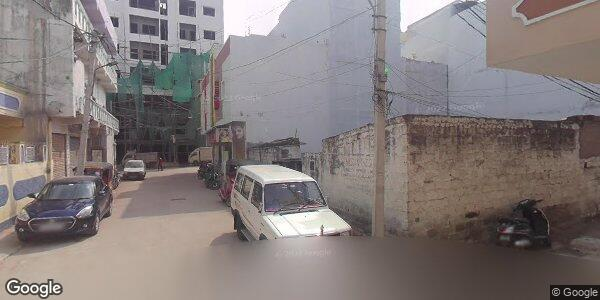

We will be using a python environment with the library `google_streetview` as well as the Google Cloud Developer environment which will be necessary to access the images.  

# Copyright: Apache 2.0 License



```
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

```


# Colab Basics




## Colab and Jupyter Notebooks


A Colab consists of a Jupyter notebook that is set up in the cloud. Jupyter notebooks (and thus Colabs) are composed of text cells (like this one) and code cells. An example of a code cell is below; it is marked by two square brackets '[ ]', which turn into an arrow when you move the cursor over them. Clicking on the arrow "runs" the cell: the code contained in the cell is executed. If the code produces an output, it is displayed underneath. There may be a number enclosed between the two brackets. This indicates that the code has been run multiple times. 

In [ ]:
print("Hello World")

Hello World


## Google Account
You need to have a Google account that lets you store files on GDrive. If you have a Gmail account, you should be able to go to [Google Drive](https://drive.google.com/) and log in with your Gmail login and password. 




## Create Your Copy
If you want to use and modify a lab, you need to save a copy. To do so, go to the 'File' menu, select 'Save a copy in Drive' and change the name (it begins with 'Copy of ...'). You can share Colab notebooks with others, similar to sharing a document on Google Drive. 


## Set Up a Colab
Colabs run in the cloud through your Web browser. There's no need to install software on your computer. A Colab may require other software (libraries) to run, but this is done in the Colab itself, usually at the beginning.  

# Overview

This section gives the participants a preview of the activity they are going to work on. It should be short, maybe one paragraph or so. If more information is needed, add extra sections below.

## Prerequisites

This tutorial assumes a basic understanding of the Python Programming Language, as well as the ability to create a Google developer account. 

This line installs a library that makes interacting with Google StreetView easier

In [ ]:
!pip install google_streetview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for google-streetview: filename=google_streetview-1.2.9-py3-none-any.whl size=9797 sha256=25a6cf46edb67f7bde3982de94ceae3f4f026c2fb2b9cd5c2805d3deb29e8d7f
  Stored in directory: /root/.cache/pip/wheels/fd/75/b1/b34485a2008a5b7f34fefbf813ff34ed83b55919daeb0a7082
  Created wheel for kwconfig: filename=kwconfig-1.1.7-py3-none-any.whl size=4990 sha256=13c00a405e53041929abb168315097b81c0d2bcb1405f8a632c6e9e2e563e217
  Stored in directory: /root/.cache/pip/wheels/e7/c2/f2/64b70fa3cd0e638118a3e75bb2d2e1a0e0599a1e7598d50c8b
Successfully built google-streetview kwconfig


##Learning Objectives

Provide a list of 3-5 goals that the participants should be able to achieve by following the steps described in the activity. Here are the ones for this template (albeit not very well formulated as "learning" objectives):


*   Understand what an API is
*   Understand the necessity of a private API key
*   Generate your own private API key
*   Access images from your own hometown



## What is an API?

API stands for Application Programming Interface

- **A**pplication
- **P**rogramming
- **I**nterface

APIs are used to give programmers a way to interact with something in a structured format. For our scenario, we will use an API to request access to specific images from the trillions of images provided by Google. We need to tell Google in a way that it will understand otherwise it cannot guess what information we need.

For more information about APIs, click [here!](https://aws.amazon.com/what-is/api/)

## What is a private API key?

A private API key is a way for a user to authenticate themselves to a given API. This key is unique to a user, and can prevent misuse or abuse of a public API. 

# Google Cloud Console Setup

To start things off, you must set up a Google Cloud Project before accessing the APIs, and enable billing for the project. **No need to worry about any form of charges for the purposes of this tutorial**, since projects are given 200\$ in free credits just for Google Maps Platform as well as 300\$ in free trial credits for the Google Cloud Platform overall.

**See [here](https://developers.google.com/maps/billing-and-pricing/billing#monthly-credit) for more information on Google Cloud Project billing.**

**See [here](https://developers.google.com/maps/documentation/streetview/usage-and-billing) for Google Street View Static API specific pricing and billing information.**

The setup for a Google Cloud Project is easy, and will allow you to generate an API key in order to make requests to the Google Street View Static API. Google's official documentation provides a nice step by step tutorial [here](https://developers.google.com/maps/documentation/streetview/cloud-setup).

**Once finished with this aspect of the tutorial, you should have a Google Cloud Project set up with billing and the Google Street View Static API enabled.**

For security purposes, once finished with this tutorial you may want to disable billing for your Google Cloud Project (or delete it). It is suggested to delete your API key as well. (These can be done in the Google Cloud Project dashboard).

Now, you can move on to generating your own API key.

# How do I create my private API key?

You can create your API key by using Google's official guide (documentation found [here.)](https://cloud.google.com/docs/authentication/api-keys) Follow the guide and come back with your key!

# How do I access Google StreetView Images? 

First we will have you save your API key to a variable we use later

In [ ]:
key = 'myKey' # Replace with your private API key

Now we'll import the library we installed earlier

In [ ]:
import google_streetview.api

Now lets find out some coordinate points of interests. Here we are looking at specific coordinates from a city called Hyderabad, located in India. This is one of the cities we used for data collection for our quarter project.

You can also do this manually by going to Google maps and finding locations, or you can find less exact coordinates by searching places you want to see!

In [ ]:
# coordinates of locations in "longitude, latitude" format
# Hyderabad, India
coords = [
    "17.381360, 78.481103", 
    "17.380055, 78.479990"
]

Then lets generate a list of dictionaries of all the parameters we need access to.

- `size` is the image pixel size, its maximum is 640x640
- `location` is the coordinate of the image we are looking for
- `heading` is the direction we are looking, north is 0, east is 90, south is 180
- `pitch` is the vertical angle we are looking, 90 is directly up, -90 is directly down, and 0 is flat
- `key` is your private key you created earlier
- `source` is optional, here we are specifying we only want images from outdoors.


In [ ]:
params = [{
    'size': '600x300', 
    'location': coord,
    'heading': '151.78',
    'pitch': '-0.76',
    'key': key,
    'source': 'outdoor'
    } for coord in coords]

Now lets send our well formatted request to Google! You can find the images in directly in the Google Colab file browser to the left (the file icon).

In [ ]:
   # Create a results object
results = google_streetview.api.results(params)

    # Download images to directory 'downloads'
results.download_links('downloads')

    # Save links
results.save_links('links.txt')

    # Save metadata
results.save_metadata('metadata.json')

# Excerise: Find Your Own Coordinates To Retrieve Images

Now it's your turn to pick some coordinates and make your own request to the API. Try your home, or any area of interest to you!

Use [Google Maps](https://www.google.com/maps) to retrieve the coordinates of your choosing.

NOTE: Not all coordinates have a corresponding google street view image as Google cannot capture every single road in the world. If your coordinates do not work the first time, try some others or even better pick coordinates from a location you know has a street view associated with it.

In [ ]:
# Insert your own coordinates here!
coords = [
    "longitude, latitude", # add more than one coordinate if you wish
]

In [ ]:
params = [{
    'size': '600x300', 
    'location': coord,
    'heading': '151.78',
    'pitch': '-0.76',
    'key': key,
    'source': 'outdoor'
    } for coord in coords]

In [ ]:
# Create a results object
results = google_streetview.api.results(params)

# Download images to directory 'downloads'
results.download_links('downloads')

# Save links
results.save_links('links.txt')

# Save metadata
results.save_metadata('metadata.json')

# Data Set

The google street view API does not use a data set, rather a set of coordinates as a parameter to output or return a data set of multiple images in the form of a jpg image file.

# Conclusions

In conclusion, you learned what an API is, how to generate your very own Google API key, and how to properly request images from Google's Street View API and store them.

For more information on the API, as well as more information on the billing process, look here: (https://developers.google.com/maps/documentation/streetview)

Don't worry this tutorial has not cost you any money! Only exceeding 25k requests in a day will require a digital signature that will result in billing by Google for using this service.

#Future Work

Now that you have learned how to retrieve images from Google Street View API, you have an idea how to get a solid dataset of images.


Potential future work using this dataset could involve image classification tasks. Some potential ideas include demographic estimation, population heatmaps, or even city cleanliness (estimating how much litter there is for a given city through street view images).


Here are some good computer vision libraries to get you started:


*   Scikit-image (https://scikit-image.org/)
*   SciPy (https://scipy.org/)
*  OpenCv (https://opencv.org/)



# References

* Google. (2022). Google Maps Street View Static API Documentation. https://developers.google.com/maps/documentation/streetview
* Bonner, A. (2019). Getting Started With Google Colab. Medium. 
https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c
* Dair.AI. (2019). Writing Primer for Data Scientists. DAIR Diverse Artificial Intelligence Research Initiative. https://colab.research.google.com/drive/1qi8bXjH389MipsFx3KVQQwGwefDgzzoe
* Elvis. (2018). Primer for Learning Google Colab. Medium. https://medium.com/dair-ai/primer-for-learning-google-colab-bb4cabca5dd6
* Google CoLab. (2018). Google Colaboratory: Welcome: Introduction to Machine Learning Labs. Google. https://colab.research.google.com/drive/1EIB6pAaMM6C2MIdxsrGntYrQoUfcsbmS#forceEdit=true&sandboxMode=true
* Sagar, A. (2019). One-Stop Guide to Google Colab. Medium. https://towardsdatascience.com/one-stop-guide-to-google-colab-d67c94d30516




# Acknowledgements





Google's Developer Guide was great for showing template code in formatting the request and response for street view images. https://developers.google.com/maps/documentation/streetview/request-streetview